---
title: "K Means"
description: "KMeans is a clustering algorithm that partitions a dataset into K distinct, non-overlapping subsets (clusters) based on similarity patterns within the data. It minimizes the sum of squared distances between data points and their assigned cluster centroids."
author: "Vraj Shah"
date: "9/20/2023"
---

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D

## KMeans on Dataset

### Data

In [2]:
y = load_digits()
x = y.data

In [3]:
print(y.data.shape)
print(y.target.shape)

(1797, 64)
(1797,)


### Closest Centroids

In [4]:
def find_closest_centroids(X, centroids):

    idx = np.zeros(X.shape[0], dtype=int)
    distances = np.linalg.norm(X[:, np.newaxis, :]-centroids, axis=-1)
    idx = np.argmin(distances, axis=1)

    return idx

### New Centroids

In [5]:
def compute_centroids(X, idx, centroids, k):
    for i in range(k):
        centroids[i] = np.mean(X[idx == i], axis=0)
    return centroids

### Cost Fxn

In [6]:
def calculate_cost(X, idx, centroids):
    cost = 0
    for i in range(len(centroids)):
        cluster_points = X[idx == i]
        centroid = centroids[i]
        squared_distances = np.sum((cluster_points - centroid) ** 2)
        cost += squared_distances
    return cost

### KMeans

In [7]:
def run_kMeans(X, max_iters, k):
    n, d = X.shape
    centroids = X[np.random.choice(n, k, replace=False)]

    print(f"{'Iteration':<10}{'Cost':<15}")

    prev_cost=np.inf
    cost=0

    for i in range(max_iters):
        if np.abs(prev_cost-cost)<1e-5:
            break
        idx = find_closest_centroids(X, centroids)
        prev_cost=cost
        cost = calculate_cost(X, idx, centroids)

        print(f"{i + 1:<10}{cost:<15}")

        centroids = compute_centroids(X, idx, centroids, k)

    return centroids, idx

### Accuracy

In [8]:
a, b = run_kMeans(x, 500, 10)
print("Accuracy =", 100*np.mean(y.target == b) ,"%")

Iteration Cost           
1         2312326.0      
2         1367849.205211381
3         1272514.7623466342
4         1230713.3819844497
5         1217124.8773493604
6         1214638.5685729042
7         1214183.403014829
8         1214039.6629300476
9         1213981.741130655
10        1213950.3799817525
11        1213908.3568474432
12        1213896.1627396639
13        1213875.909452301
14        1213848.8851707997
15        1213820.8739280729
16        1213820.8739280729
Accuracy = 19.47690595436839 %


## Image compression with K-means

### Original Image

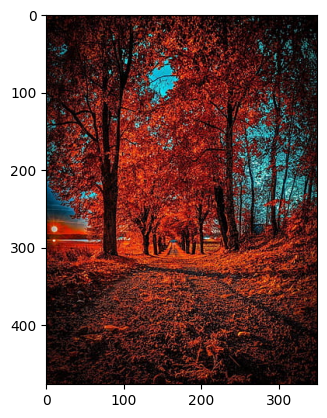

In [9]:
original_img = plt.imread('img.jpg')
plt.imshow(original_img)
plt.show()

In [10]:
# Gives the blue intensity of the pixel at row 50 and column 33.
original_img[50, 33, 2]

3

In [11]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (477, 350, 3)


### KMeans

In [12]:
X_img = np.reshape(
    original_img, (original_img.shape[0] * original_img.shape[1], 3))
print("Shape of X_img is:", X_img.shape)

Shape of X_img is: (166950, 3)


In [13]:
max_iter = 30
k = 15
centroids, idx = run_kMeans(X_img, max_iter, k)

Iteration Cost           
1         40518784       
2         49937840       
3         38376899       
4         48464334       
5         38469257       
6         44709319       
7         45348539       
8         48159095       
9         46984087       
10        41761944       
11        45318104       
12        45340223       
13        46252334       
14        47408590       
15        40701877       
16        48466062       
17        52976465       
18        50425878       
19        48800590       
20        49841789       
21        50815087       
22        46825849       
23        47234052       
24        50064839       
25        45833848       
26        44100214       
27        44035480       
28        42271855       
29        46069851       
30        46009134       


### RGB Values plot with Centroids

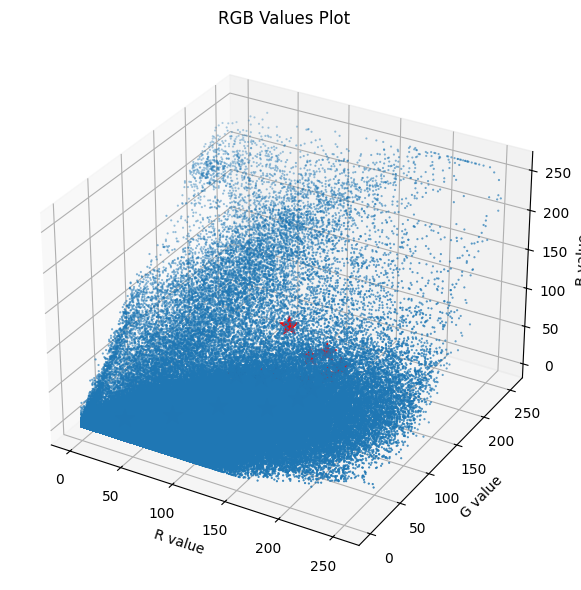

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_img[:, 0], X_img[:, 1], X_img[:, 2], s=0.3)
ax.set_xlabel('R value')
ax.set_ylabel('G value')
ax.set_zlabel('B value')
ax.set_title('RGB Values Plot')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=200, alpha=1, marker='*', c='red', zorder=2)
fig.tight_layout()
plt.show()

### Colors of Centroids

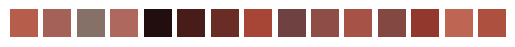

In [15]:
fig, axs = plt.subplots(1, len(centroids))
for i in range(len(centroids)):
    axs[i].imshow(centroids[i].reshape(1, 1, 3))
    axs[i].axis('off')
plt.show()

### Decomposed Image

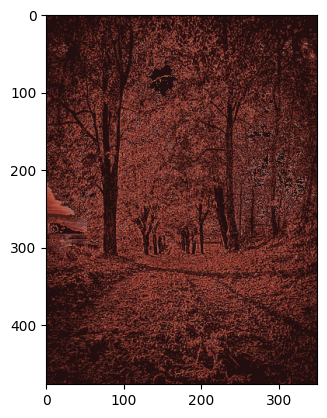

In [16]:
X_recovered = centroids[idx, :]
X_recovered = np.reshape(X_recovered, original_img.shape)

plt.imshow(X_recovered)

plt.show()